In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [18]:
img = Image.open('./images/sasuki.jpg').convert('L')

In [19]:
# Perform SVD
def SVD_Funtion(img, k):
    U, S, Vt = np.linalg.svd(img, full_matrices=False)
    # Keep only the first k singular values
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k, :]
    # Reconstruct the image
    image_reconstructed = np.dot(U_k, np.dot(S_k, Vt_k))
    return image_reconstructed

In [31]:
def SVD_Scratch(img, k):
    A = np.array(img)
    ATA = np.dot(A.T, A)
    eigenvalues_v, eigenvectors_v = np.linalg.eig(ATA)
    sorted_indices = np.argsort(eigenvalues_v)[::-1]
    V = eigenvectors_v[:, sorted_indices]
    singular_values = np.sqrt(eigenvalues_v[sorted_indices])
    U = np.dot(A, V)
    U = U / np.linalg.norm(U, axis=0)
    U_k = U[:, :k]
    sigma_k = np.diag(singular_values[:k])
    V_k = V[:, :k]
    A_k = np.dot(U_k, np.dot(sigma_k, V_k.T))
    return A_k

In [32]:
k = 50  # You can change this value
final_img = SVD_Funtion(img, k)
final_img2 = SVD_Scratch(img, k)

C:\Users\Student\AppData\Local\Temp\ipykernel_5948\454085255.py:7: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigenvalues_v[sorted_indices])


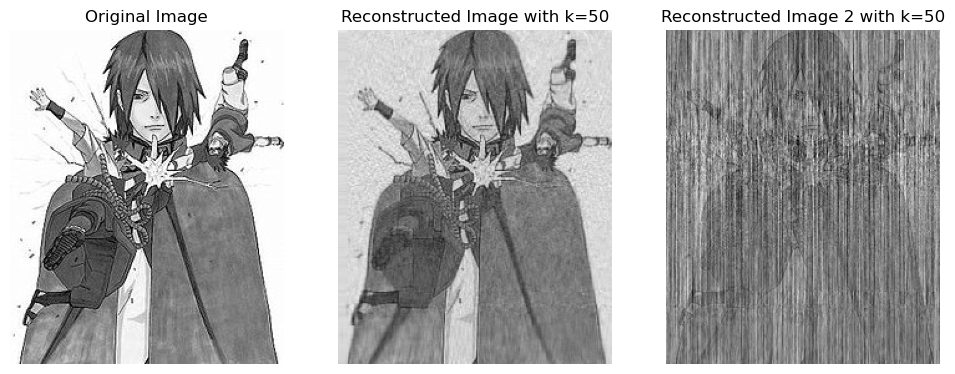

In [34]:
# Display the reconstructed image
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(final_img, cmap='gray')
plt.title(f'Reconstructed Image with k={k}')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(final_img2, cmap='gray')
plt.title(f'Reconstructed Image 2 with k={k}')
plt.axis('off')

plt.show()



In [35]:
# Calculate Mean Squared Error
mse1 = np.mean((img - final_img) ** 2)
mse2 = np.mean((img - final_img2) ** 2)
print(f'Mean Squared Error of first image: {mse1:.2f}')
print(f'Mean Squared Error of second image: {mse2:.2f}')


Mean Squared Error of first image: 340.35
Mean Squared Error of second image: 32659.16
